# Πρόκληση: Ανάλυση Κειμένου για την Επιστήμη Δεδομένων

> *Σε αυτό το σημειωματάριο, πειραματιζόμαστε με τη χρήση διαφορετικών URL - άρθρο της Wikipedia για τη Μηχανική Μάθηση. Μπορείτε να δείτε ότι, σε αντίθεση με την Επιστήμη Δεδομένων, αυτό το άρθρο περιέχει πολλούς όρους, γεγονός που καθιστά την ανάλυση πιο προβληματική. Πρέπει να βρούμε έναν άλλο τρόπο να καθαρίσουμε τα δεδομένα μετά την εξαγωγή λέξεων-κλειδιών, ώστε να απαλλαγούμε από κάποιους συχνούς, αλλά όχι ουσιαστικούς συνδυασμούς λέξεων.*

Σε αυτό το παράδειγμα, ας κάνουμε μια απλή άσκηση που καλύπτει όλα τα βήματα μιας παραδοσιακής διαδικασίας επιστήμης δεδομένων. Δεν χρειάζεται να γράψετε κανέναν κώδικα, μπορείτε απλώς να κάνετε κλικ στα παρακάτω κελιά για να τα εκτελέσετε και να παρατηρήσετε το αποτέλεσμα. Ως πρόκληση, σας ενθαρρύνουμε να δοκιμάσετε αυτόν τον κώδικα με διαφορετικά δεδομένα.

## Στόχος

Σε αυτό το μάθημα, συζητήσαμε διάφορες έννοιες που σχετίζονται με την Επιστήμη Δεδομένων. Ας προσπαθήσουμε να ανακαλύψουμε περισσότερες σχετικές έννοιες κάνοντας **εξόρυξη κειμένου**. Θα ξεκινήσουμε με ένα κείμενο για την Επιστήμη Δεδομένων, θα εξάγουμε λέξεις-κλειδιά από αυτό και στη συνέχεια θα προσπαθήσουμε να οπτικοποιήσουμε το αποτέλεσμα.

Ως κείμενο, θα χρησιμοποιήσω τη σελίδα για την Επιστήμη Δεδομένων από τη Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Βήμα 1: Απόκτηση Δεδομένων

Το πρώτο βήμα σε κάθε διαδικασία επιστήμης δεδομένων είναι η απόκτηση των δεδομένων. Θα χρησιμοποιήσουμε τη βιβλιοθήκη `requests` για να το κάνουμε:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Βήμα 2: Μετατροπή των Δεδομένων

Το επόμενο βήμα είναι να μετατρέψουμε τα δεδομένα σε μορφή κατάλληλη για επεξεργασία. Στην περίπτωσή μας, έχουμε κατεβάσει τον πηγαίο κώδικα HTML από τη σελίδα και πρέπει να τον μετατρέψουμε σε απλό κείμενο.

Υπάρχουν πολλοί τρόποι για να γίνει αυτό. Θα χρησιμοποιήσουμε το πιο απλό ενσωματωμένο αντικείμενο [HTMLParser](https://docs.python.org/3/library/html.parser.html) από την Python. Πρέπει να υποκλάσουμε την κλάση `HTMLParser` και να ορίσουμε τον κώδικα που θα συλλέγει όλο το κείμενο μέσα στις ετικέτες HTML, εκτός από τις ετικέτες `<script>` και `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Βήμα 3: Απόκτηση Επισκοπήσεων

Το πιο σημαντικό βήμα είναι να μετατρέψουμε τα δεδομένα μας σε μορφή από την οποία μπορούμε να αντλήσουμε επισκοπήσεις. Στην περίπτωσή μας, θέλουμε να εξάγουμε λέξεις-κλειδιά από το κείμενο και να δούμε ποιες λέξεις-κλειδιά είναι πιο σημαντικές.

Θα χρησιμοποιήσουμε τη βιβλιοθήκη Python που ονομάζεται [RAKE](https://github.com/aneesha/RAKE) για την εξαγωγή λέξεων-κλειδιών. Πρώτα, ας εγκαταστήσουμε αυτήν τη βιβλιοθήκη σε περίπτωση που δεν είναι ήδη διαθέσιμη:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Η κύρια λειτουργικότητα είναι διαθέσιμη από το αντικείμενο `Rake`, το οποίο μπορούμε να προσαρμόσουμε χρησιμοποιώντας ορισμένες παραμέτρους. Στην περίπτωσή μας, θα ορίσουμε το ελάχιστο μήκος μιας λέξης-κλειδί σε 5 χαρακτήρες, την ελάχιστη συχνότητα μιας λέξης-κλειδί στο έγγραφο σε 3, και τον μέγιστο αριθμό λέξεων σε μια λέξη-κλειδί - σε 2. Μη διστάσετε να πειραματιστείτε με άλλες τιμές και να παρατηρήσετε το αποτέλεσμα.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Λάβαμε μια λίστα όρων μαζί με τον αντίστοιχο βαθμό σημασίας. Όπως μπορείτε να δείτε, οι πιο σχετικές επιστημονικές περιοχές, όπως η μηχανική μάθηση και τα μεγάλα δεδομένα, βρίσκονται στις κορυφαίες θέσεις της λίστας.

## Βήμα 4: Οπτικοποίηση του Αποτελέσματος

Οι άνθρωποι μπορούν να ερμηνεύσουν τα δεδομένα καλύτερα σε οπτική μορφή. Έτσι, συχνά έχει νόημα να οπτικοποιούμε τα δεδομένα για να αντλήσουμε κάποιες πληροφορίες. Μπορούμε να χρησιμοποιήσουμε τη βιβλιοθήκη `matplotlib` στην Python για να σχεδιάσουμε μια απλή κατανομή των λέξεων-κλειδιών με τη σχετικότητά τους:


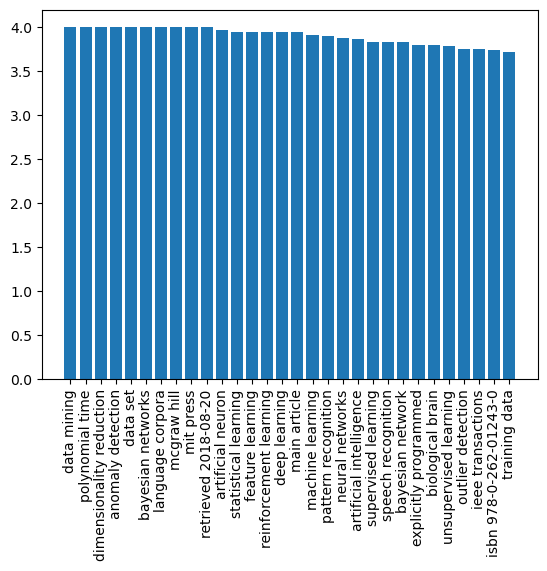

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Υπάρχει, ωστόσο, ένας ακόμη καλύτερος τρόπος να οπτικοποιήσουμε τις συχνότητες λέξεων - χρησιμοποιώντας **Word Cloud**. Θα χρειαστεί να εγκαταστήσουμε μια άλλη βιβλιοθήκη για να δημιουργήσουμε το word cloud από τη λίστα των λέξεων-κλειδιών μας.


In [71]:
!{sys.executable} -m pip install wordcloud

Το αντικείμενο `WordCloud` είναι υπεύθυνο για τη λήψη είτε του αρχικού κειμένου, είτε μιας προϋπολογισμένης λίστας λέξεων με τις συχνότητές τους, και επιστρέφει μια εικόνα, η οποία μπορεί στη συνέχεια να εμφανιστεί χρησιμοποιώντας το `matplotlib`:


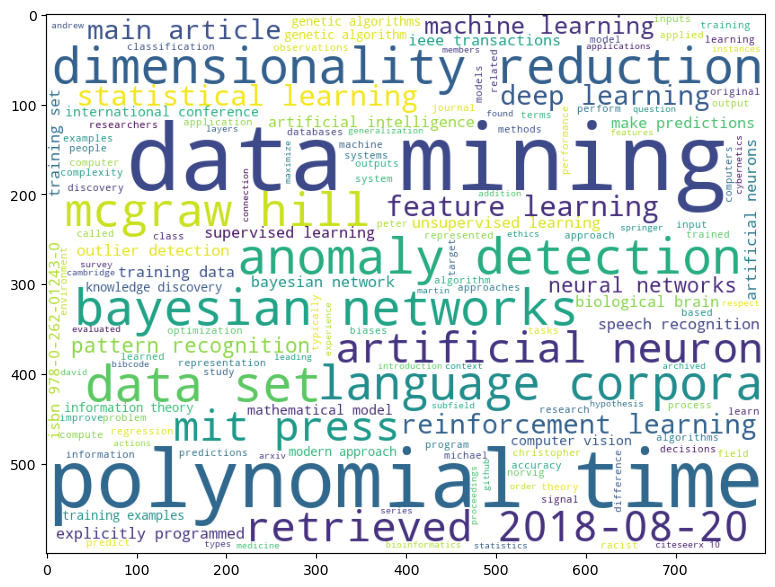

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Μπορούμε επίσης να περάσουμε το αρχικό κείμενο στο `WordCloud` - ας δούμε αν μπορούμε να έχουμε παρόμοιο αποτέλεσμα:


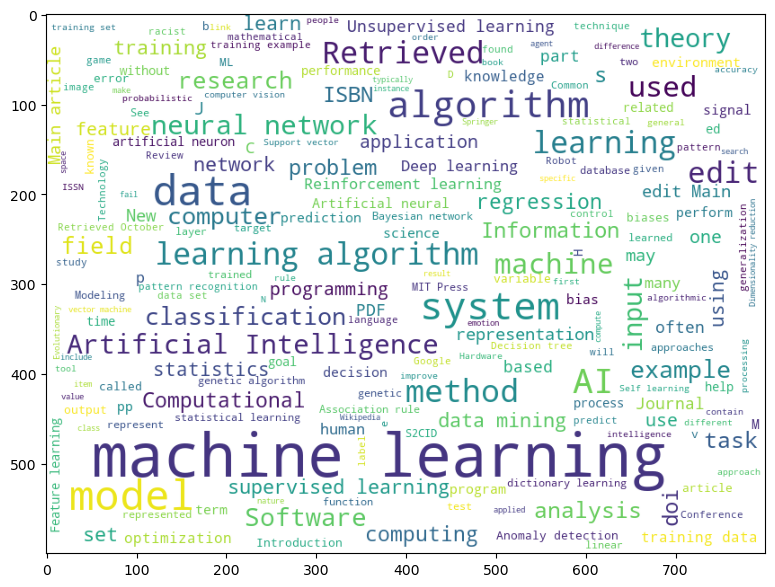

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Μπορείτε να δείτε ότι το word cloud τώρα φαίνεται πιο εντυπωσιακό, αλλά περιέχει επίσης πολύ θόρυβο (π.χ. άσχετες λέξεις όπως `Retrieved on`). Επίσης, λαμβάνουμε λιγότερες λέξεις-κλειδιά που αποτελούνται από δύο λέξεις, όπως *data scientist* ή *computer science*. Αυτό συμβαίνει επειδή ο αλγόριθμος RAKE κάνει πολύ καλύτερη δουλειά στην επιλογή καλών λέξεων-κλειδιών από το κείμενο. Αυτό το παράδειγμα υπογραμμίζει τη σημασία της προεπεξεργασίας και του καθαρισμού των δεδομένων, καθώς μια καθαρή εικόνα στο τέλος θα μας επιτρέψει να πάρουμε καλύτερες αποφάσεις.

Σε αυτή την άσκηση περάσαμε από μια απλή διαδικασία εξαγωγής νοήματος από κείμενο της Wikipedia, με τη μορφή λέξεων-κλειδιών και word cloud. Αυτό το παράδειγμα είναι αρκετά απλό, αλλά δείχνει καλά όλα τα τυπικά βήματα που ακολουθεί ένας data scientist όταν εργάζεται με δεδομένα, ξεκινώντας από την απόκτηση δεδομένων μέχρι την οπτικοποίηση.

Στο μάθημά μας θα συζητήσουμε όλα αυτά τα βήματα με λεπτομέρεια.



---

**Αποποίηση Ευθύνης**:  
Αυτό το έγγραφο έχει μεταφραστεί χρησιμοποιώντας την υπηρεσία αυτόματης μετάφρασης [Co-op Translator](https://github.com/Azure/co-op-translator). Παρόλο που καταβάλλουμε προσπάθειες για ακρίβεια, παρακαλούμε να έχετε υπόψη ότι οι αυτόματες μεταφράσεις ενδέχεται να περιέχουν σφάλματα ή ανακρίβειες. Το πρωτότυπο έγγραφο στη μητρική του γλώσσα θα πρέπει να θεωρείται η αυθεντική πηγή. Για κρίσιμες πληροφορίες, συνιστάται επαγγελματική ανθρώπινη μετάφραση. Δεν φέρουμε ευθύνη για τυχόν παρεξηγήσεις ή εσφαλμένες ερμηνείες που προκύπτουν από τη χρήση αυτής της μετάφρασης.
